 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [62]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [63]:
# Reading whale returns
whale_csv_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [64]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [65]:
# Drop nulls
#whale_no_null = whale_df.dropna()
whale_df.dropna(inplace=True)
whale_df.isnull().sum()   # make sure its cleaned

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [66]:
# Reading algorithmic returns
algo_csv_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [67]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [68]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()           #  check data is cleaned

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [69]:
# Reading S&P 500 Closing Prices
sp_csv_path = Path("Resources/sp500_history.csv")
sp_df_close = pd.read_csv(sp_csv_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_df_close.sort_index(inplace=True)
sp_df_close.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [70]:
# Check Data Types
sp_df_close.dtypes

Close    object
dtype: object

In [71]:
#sp_df.dropna(inplace=True)
sp_df_close.isnull().sum()   # check S&P nulls too

Close    0
dtype: int64

In [72]:
# Fix Data Types      # we  find that Close is string type, so we need to remover the $ sign
sp_df_close["Close"] = sp_df_close["Close"].str.replace("$", "")
print(sp_df_close.head())
sp_df_close["Close"] = sp_df_close["Close"].astype("float")
sp_df_close.dtypes

              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93


<ipython-input-72-92fe3529661e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_df_close["Close"] = sp_df_close["Close"].str.replace("$", "")


Close    float64
dtype: object

In [73]:
# Calculate Daily Returns
sp_daily_returns = sp_df_close.pct_change()
sp_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [74]:
# Drop nulls
print(sp_daily_returns.isnull().sum())
sp_daily_returns.dropna(inplace=True)
print(sp_daily_returns.isnull().sum())     # check nulls are dropped
sp_daily_returns.head()

Close    1
dtype: int64
Close    0
dtype: int64


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [75]:
# Rename `Close` Column to be specific to this portfolio.
#sp_daily_returns.columns
sp_daily_returns.rename(columns={"Close": "SPClose"},  inplace=True)

In [76]:
# whale returns - whale is already returns
#whale_returns  = whale_df.pct_change().dropna()
#whale_returns.head()

In [77]:
# Algo returns - already returns in the file. no need of pct-change
#algo_returns = algo_df.pct_change().dropna()
#algo_returns.sample(10)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [78]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp_daily_returns], axis="columns", join="inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPClose
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

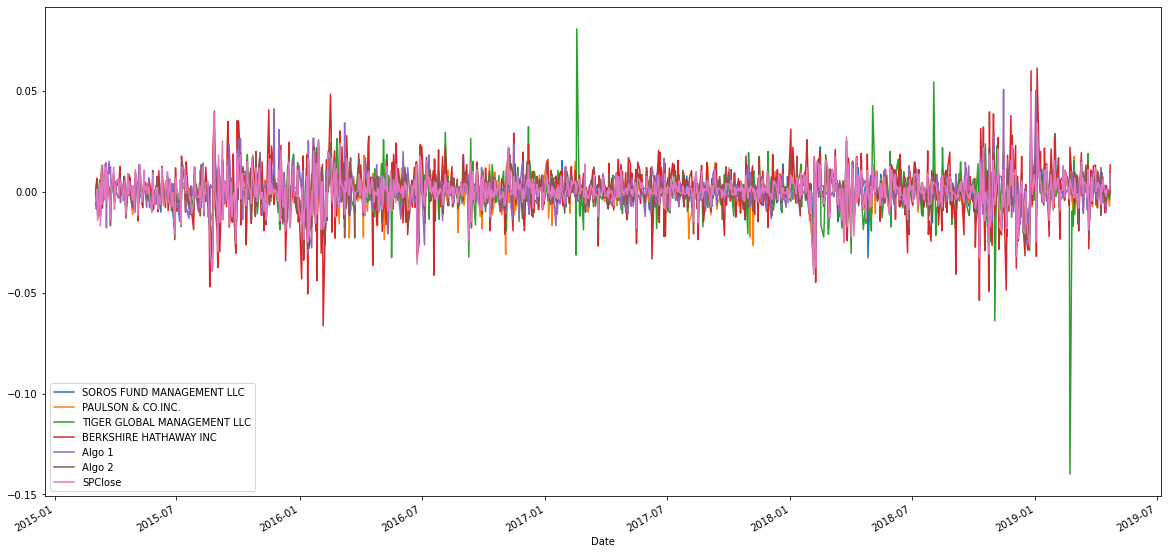

In [79]:
# Plot daily returns of all portfolios
#combined_df_daily_returns = combined_df.pct_change()
#combined_df_daily_returns.plot(figsize=(20,10))
combined_df.plot(figsize=(20,10))

In [80]:
((1 + combined_df).head()).cumprod().head() - 1     # test Cumul prod

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPClose
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.008907
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.007722
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.021786
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.017928


#### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.000962           -0.001755   
2015-03-05                   0.004981            0.002314   
2015-03-06                  -0.002963           -0.001269   
2015-03-09                  -0.002383            0.002951   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.003028               -0.002383 -0.010514   
2015-03-05                    -0.000681                0.004327 -0.011459   
2015-03-06                    -0.009156               -0.008828 -0.016359   
2015-03-09                    -0.003367               -0.010466 -0.021717   

              Algo 2   SPClose  

<AxesSubplot:xlabel='Date'>

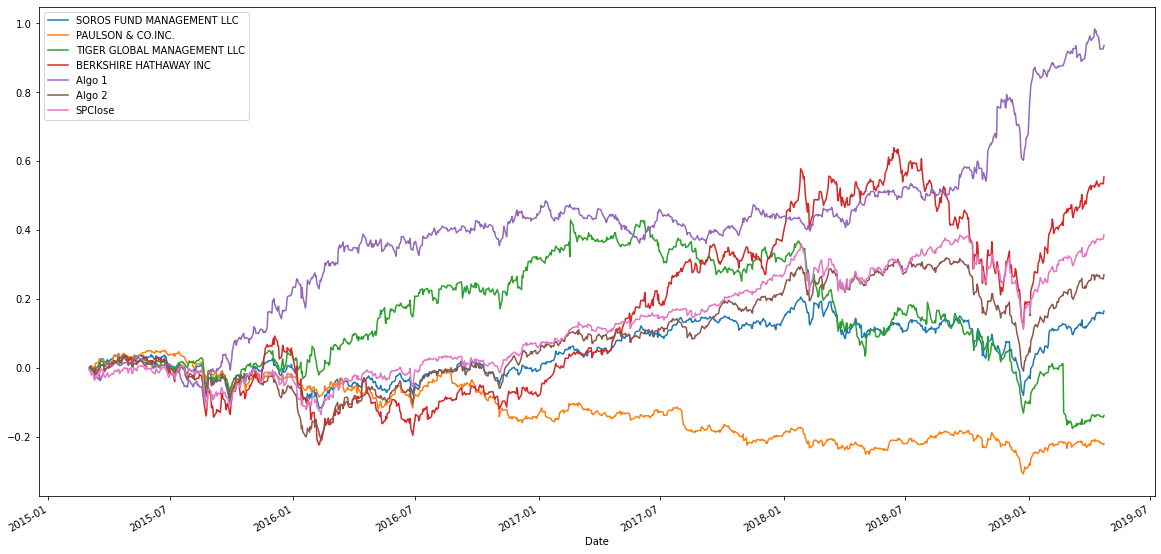

In [81]:
# Calculate cumulative returns of all portfolios
cumulative_combined_returns = (1 + combined_df).cumprod() - 1
print(cumulative_combined_returns.head())
# Plot cumulative returns
cumulative_combined_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

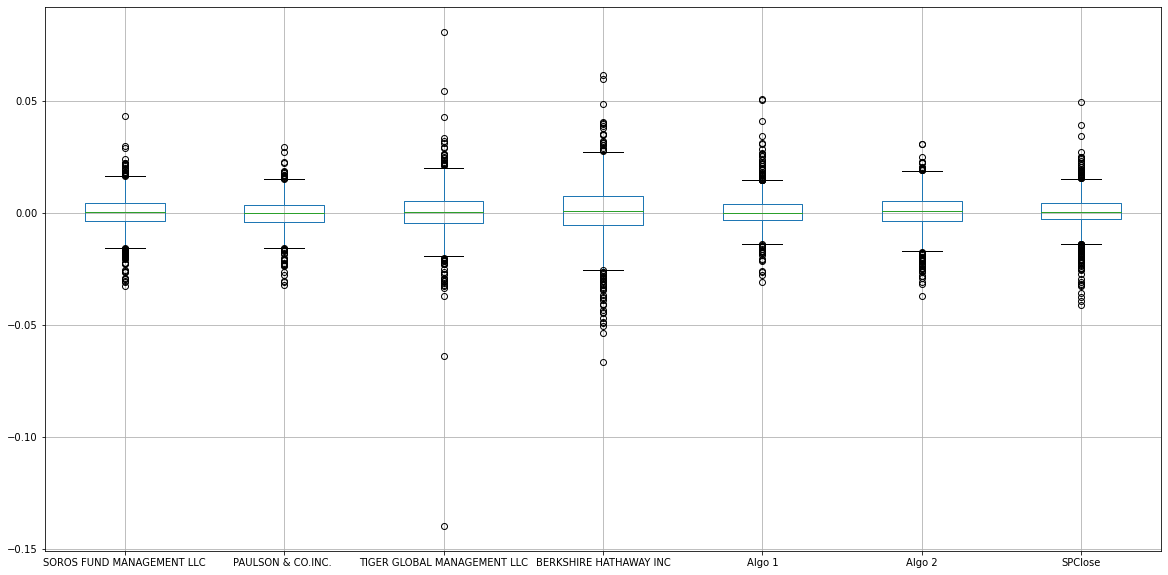

In [82]:
# Box plot to visually show risk
#cumulative_combined_returns.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'Algo 1', 'Algo 2' ])
combined_df.boxplot(figsize=(20,10))

In [83]:
# combined_df.plot.box(figsize=(20,10))    # Another way  to do boxplot

In [84]:
# compare with S&P to get better idea
#combined_df.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'SPClose' ])

### Calculate Standard Deviations

In [85]:
# Calculate the daily standard deviations of all portfolios
#print(whale_df.std())
#print(algo_df.std())
#print(sp_daily_returns.std())
combined_daily_std = combined_df.std()
combined_daily_std = combined_daily_std.sort_values(ascending=False)
print(combined_daily_std)
type(combined_daily_std)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SPClose                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64


pandas.core.series.Series

In [86]:
# # temporary checks individually- 
# print(sp_daily_returns.std())
# print(whale_df.std())
# print(whale_df.columns)
# #print('Soros = ', whale_df['SOROS FUND MANAGEMENT LLC'].std())
# #print('Paulson',whale_df['PAULSON & CO.INC. '].std())
# #print(whale_df['TIGER GLOBAL MANAGEMENT LLC'].std())
# #print(whale_df['BERKSHIRE HATHAWAY INC'].std())
# print(algo_df.columns)
# #print(algo_df['Algo 1'].std())
# #print(algo_df['Algo 2'].std())

### Determine which portfolios are riskier than the S&P 500

In [87]:
# Calculate  the daily standard deviation of S&P 500
SPclose_std = combined_daily_std['SPClose']

# Determine which portfolios are riskier than the S&P 500
print('Riskier than S&P:')
for index, value in combined_daily_std.items():
#    print(index, value)
    if value > SPclose_std:
        print(index)

Riskier than S&P:
BERKSHIRE HATHAWAY INC
TIGER GLOBAL MANAGEMENT LLC


In [88]:
print(f'Algo count = {len(algo_df)}')
print(f'Whale count = {len(whale_df)}')
print(f'S&P count = {len(sp_daily_returns)}')
print(f'Combined count = {len(combined_df)}')

Algo count = 1235
Whale count = 1059
S&P count = 1648
Combined count = 1043


##### BERKSHIRE HATHAWAY INC and TIGER GLOBAL MANAGEMENT LLC are more riskier than S&P500 as their Stadard deviation is greater than S&P500
###### Note - there are minor variances in Standard deviation when combined portfolios vs individually on whales, algo and S&P. But for the calculations we have this is ok since the order of ranking of standard deviations remain same. This is because when we combine with inner join some dates that dont match are excluded in the Combined dataframe. But its important to that that into consideration that we are only accounging std comaprison for the dates matched

### Calculate the Annualized Standard Deviation

In [89]:
# Calculate the annualized standard deviation (252 trading days)
# Annualized Standard Deviation = Standard Deviation of Daily Returns * Square Root (250)
annualized_std = combined_daily_std * np.sqrt(252)
print(annualized_std)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SPClose                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

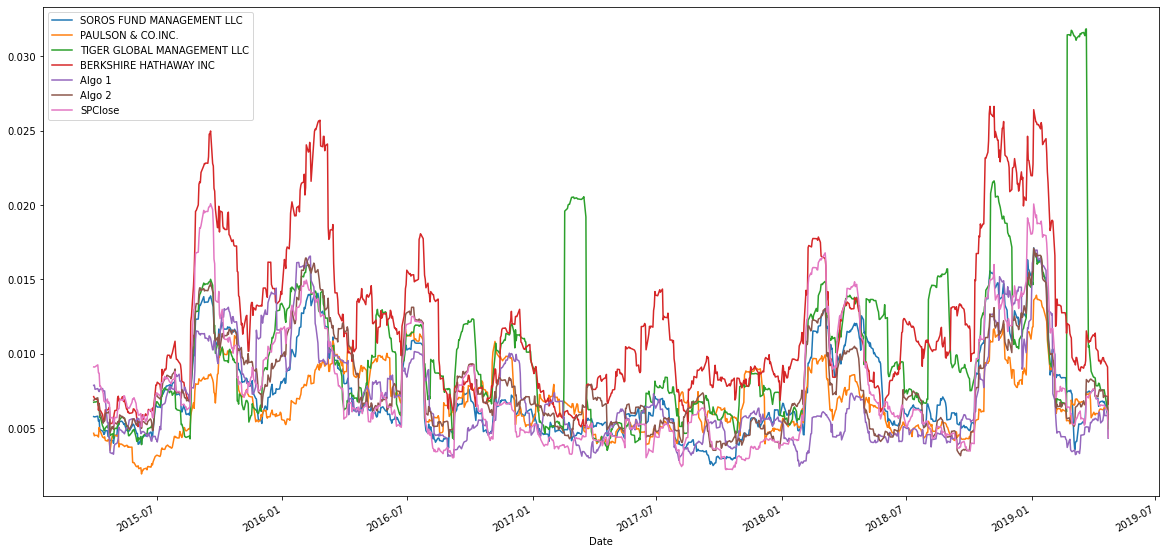

In [90]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
#sp_daily_returns_21 =  sp_daily_returns.rolling(window=21).std()
#print(sp_daily_returns_21.head(30))     # check results
#sp_daily_returns_21.dropna(inplace=True)
#print(sp_daily_returns_21.head(30))     # check results
#sp_daily_returns_21.plot()
combined_daily_std_21 =  combined_df.rolling(window=21).std()
#print(combined_daily_std_21.head(30))     # Check results
combined_daily_std_21.dropna(inplace=True)
#print(combined_daily_std_21.head())        # Check results


# Plot the rolling standard deviation
combined_daily_std_21.plot(figsize=(20,10))

### Calculate and plot the correlation

In [91]:
# Calculate the correlation
daily_returns_correlation = combined_df.corr()
# Display de correlation matrix
daily_returns_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPClose
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SPClose,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:>

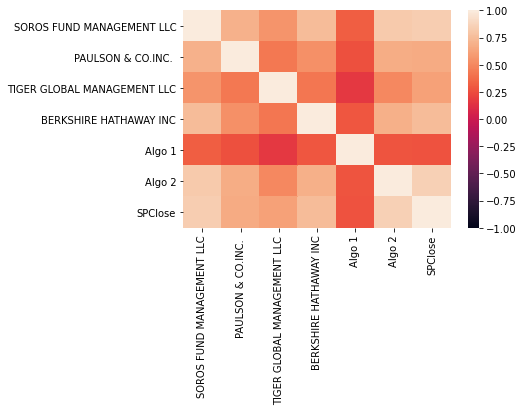

In [92]:
# Heatmap
sns.heatmap(daily_returns_correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Berkshire Beta w S&P'}, xlabel='Date'>

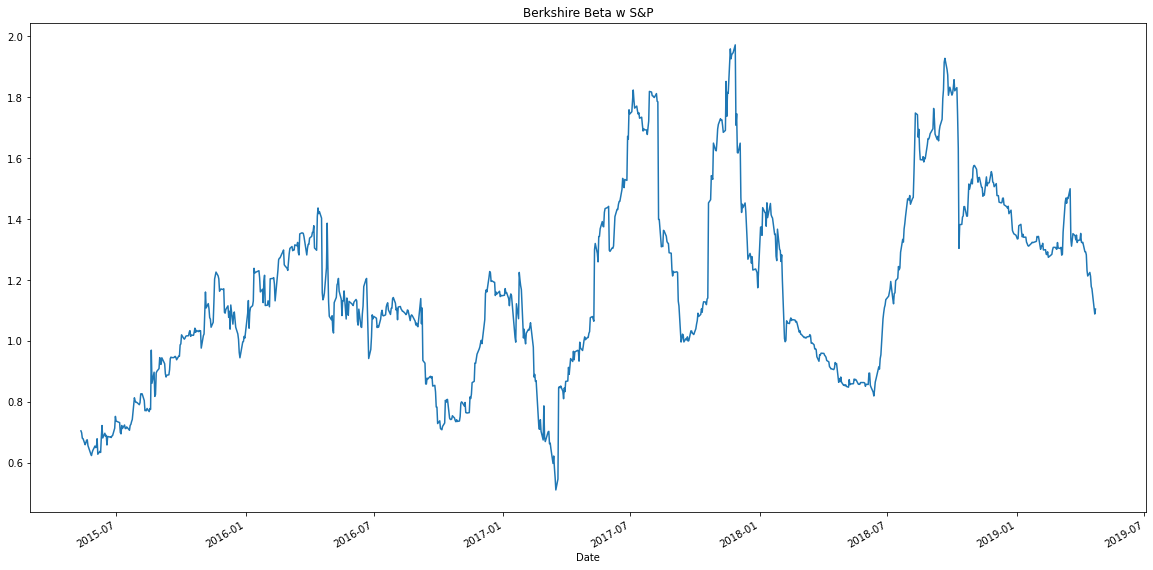

In [111]:
# Calculate covariance of a single portfolio
#print(combined_df.info())
#combined_df['BERKSHIRE HATHAWAY INC']
covariance_berkshire = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=50).cov(combined_df['SPClose'])
#print(covariance_berkshire)
#covariance_berkshire.plot()
# Calculate variance of S&P 500
variance_SP = combined_df['SPClose'].rolling(window=50).var()
#print(variance_SP)
# Computing beta
berkshire_beta = covariance_berkshire / variance_SP
#print(berkshire_beta)
# Plot beta trend
berkshire_beta.plot(figsize=(20, 10), title='Berkshire Beta w S&P')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

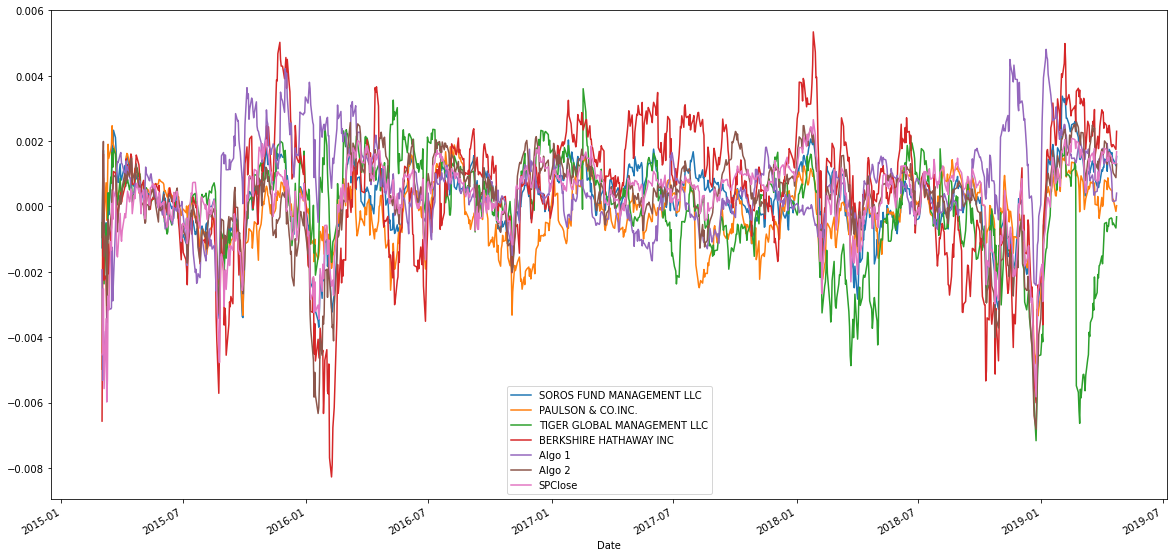

In [118]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife='21 days', times=pd.DatetimeIndex(combined_df.index)).mean().plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [123]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
print(sharpe_ratios)

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SPClose                        0.648267
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

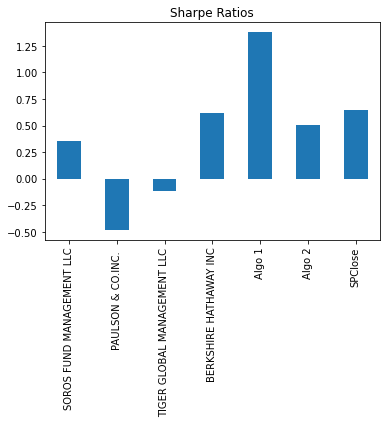

In [124]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
Usually, any Sharpe ratio greater than 1.0 is considered acceptable to good by investors. A ratio higher than 2.0 is rated as very good. A ratio of 3.0 or higher is considered excellent. A ratio under 1.0 is considered sub-optimal.

#### ALGO 1 outperforms the S&P 500 and Whales portfolios
#### but ALGO 2 outperforms only SOROS FUND MANAGEMENT LLC , PAULSON & CO.INC., and TIGER GLOBAL MANAGEMENT LLC. But it does not outperform BERKSHIRE HATHAWAY INC, Algo 1 and S&P 500

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!